## Preprocessing

In [1]:
### Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_excel('PDataset4.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))
#print(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 71)

## Calling the Random Forest Regressor

In [2]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 71)

## Applying Grid Search to find the best model and the best parameters

In [3]:
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
               'min_samples_split': [2, 3, 4],
               'min_samples_leaf': [1, 2, 3, 4],
               'n_estimators' : [5, 10, 25, 50, 100, 200]}]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

Best Accuracy: 0.9814841049831685
Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [4]:
results_df = pd.DataFrame(grid_search.cv_results_)

from pathlib import Path
filepath1 = Path.cwd().parent
filepath2 = Path(filepath1/'Results/1D_RF_Hyperparameter/rf_hyperparameter.csv')  
filepath2.parent.mkdir(parents=True, exist_ok=True)
results_df.to_csv(filepath2)

## Training the Decision Tree Regression model on the Training set

In [5]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50,
                                  max_depth = 7,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 71)

regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=50, random_state=71)

## Create a KFold object with 5 splits 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
print (scores)
print (scores.mean())
regressor

## Predicting the Test set results

In [6]:
y_pred = regressor.predict(X_test)
#print (y_pred)
#print (y_test)
#print (len(y_pred))
np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(file)

[[ 119.43  117.57]
 [ 939.1   949.31]
 [ 191.84  200.22]
 [ 225.43  219.42]
 [ 113.29  112.12]
 [1632.24 1447.06]
 [ 145.49  150.68]
 [ 157.42  157.24]
 [ 111.06  109.06]
 [ 672.45  724.54]
 [ 404.01  417.99]
 [ 119.43  118.26]
 [ 188.29  195.43]
 [1374.22 1113.99]
 [ 114.01  114.48]
 [ 118.85  115.74]
 [ 116.51  115.79]
 [ 186.18  197.38]
 [ 118.85  117.61]
 [ 113.1   109.28]
 [ 563.01  626.02]
 [1292.42 1196.18]
 [ 107.86  110.56]
 [ 132.73  130.94]
 [ 112.65  112.99]
 [ 154.31  148.55]
 [ 118.94  119.54]
 [ 229.91  230.67]
 [ 117.11  116.75]
 [ 126.38  126.05]
 [ 106.15  104.27]
 [3491.92 3327.9 ]
 [ 125.46  124.15]
 [ 175.87  171.84]
 [2200.   2259.19]
 [ 125.46  123.17]
 [3816.56 4232.15]
 [ 184.23  167.83]
 [ 132.88  134.7 ]
 [ 117.49  114.12]
 [ 401.54  397.25]
 [ 317.54  324.37]
 [1411.33 1550.45]
 [ 401.17  403.13]
 [ 127.55  130.95]
 [ 120.16  120.33]
 [ 132.72  132.34]
 [ 115.1   113.93]
 [ 249.17  261.17]
 [ 188.92  193.11]
 [ 132.88  137.57]
 [ 188.97  203.69]
 [ 119.84  1

## Evaluating the Model Performance

### R2

In [7]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9885153756597591


### Adj R2

In [8]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9882482913727768


### RMSE

In [9]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

137.67305612155783

### MAE

In [10]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

44.3962263069691

## Visualize

Text(0, 0.5, 'Predicted data')

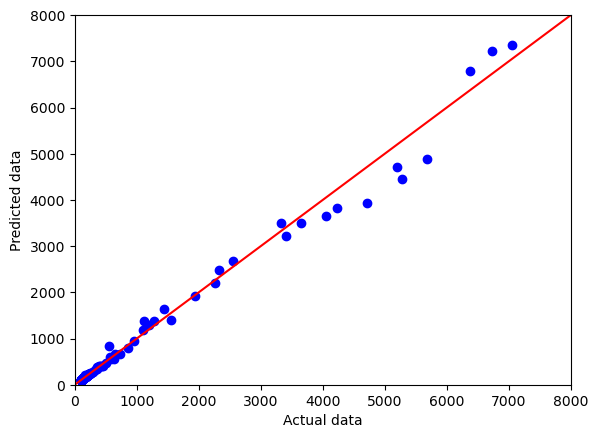

In [11]:
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,8000],[0,8000], color = "red")
plt.axis ([0,8000,0,8000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

## Error percentage visualization

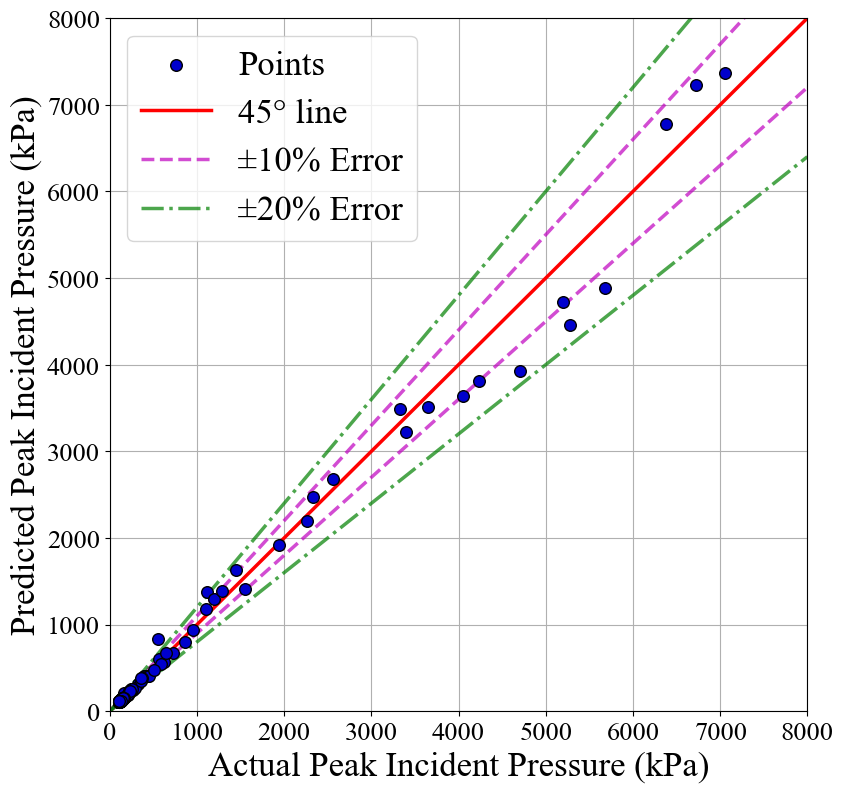

In [41]:
from sklearn.metrics import r2_score
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test
# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


# Add scatterplot
ax.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,8000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 8000)
plt.xlim(0, 8000)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
#ax.annotate("Adj.R$^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

plt.savefig('Images/plotR1.png', dpi = 600, bbox_inches = 'tight')

## Error margins

In [14]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 93.79%
Within 20% margin 98.31%
Out of 20% margin 1.69%


## <500 kPa

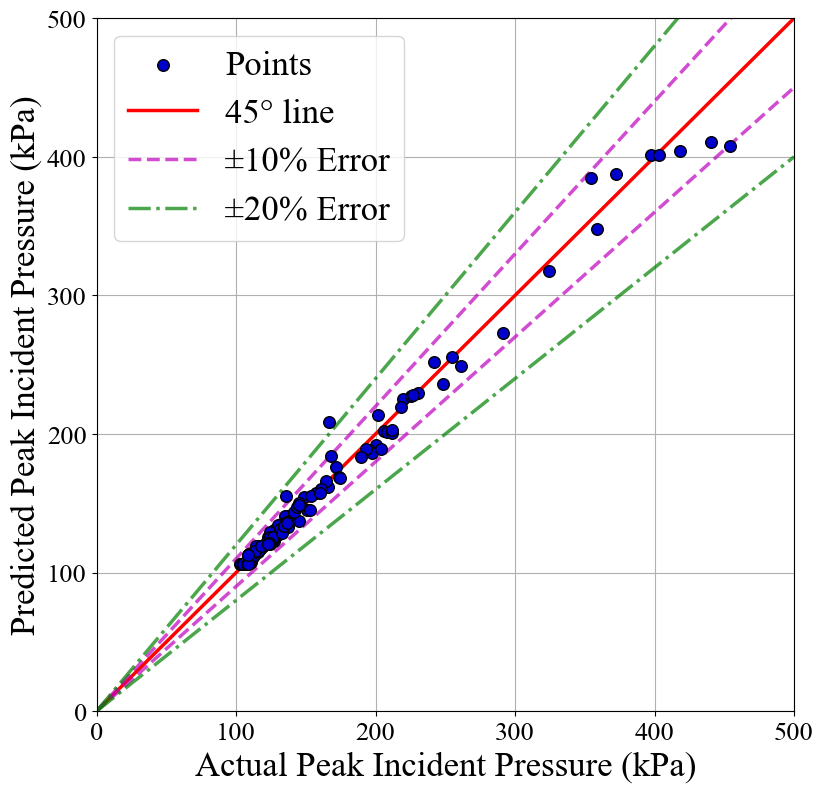

In [15]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, bx = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test
# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


# Add scatterplot
bx.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,500)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7) #\u00B1
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 500)
plt.xlim(0, 500)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

bx.spines['left'].set_color('black')        # setting up Y-axis tick color to red
bx.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax.annotate("$R^2$ = {:.3f}".format(r2_score(y_test, y_pred)), (5000, 2000),fontsize = 25)  #Model is called here

plt.savefig('Images/plotR2.png', dpi = 600, bbox_inches = 'tight')

## Save the model to disk

In [16]:
import pickle
filename = 'finalized_model_RF.sav'
pickle.dump(regressor, open(filename, 'wb'))

## Make new predictions

In [ ]:
%%timeit -r 1 -n 1
comp_data = pd.read_excel('ForPaperComparison.xlsx')
print (comp_data)
#comp_data = np.array(ct.fit_transform(comp_data))
#print (comp_data)
comp_data_pred = regressor.predict(comp_data)
print (comp_data_pred)

## SHAP

In [17]:
import shap
#print (shap.__version__)

In [18]:
# Create object that can calculate shap values for an ensemble tree model
explainer = shap.TreeExplainer(regressor)

In [19]:
# Calculate Shap values
shap_values = explainer.shap_values(X_train)

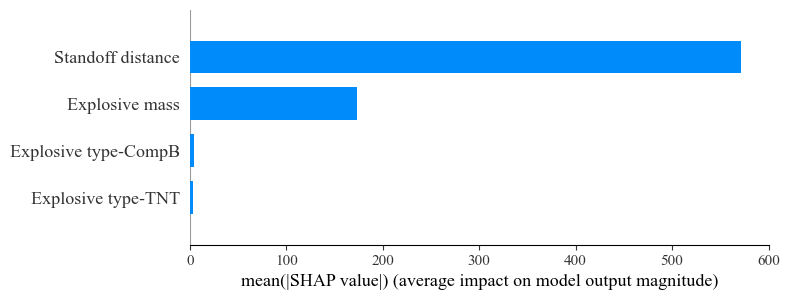

None


<Figure size 2000x500 with 0 Axes>

In [20]:
#Summary plot type 1
features = ['Explosive type-CompB', 'Explosive type-TNT', 'Explosive mass', 'Standoff distance']
shap.summary_plot(shap_values, X_train, feature_names = features, plot_type="bar")
print (plt.gcf().set_size_inches(20,5))

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [35]:
cmap = (mpl.colors.ListedColormap(['blue','orange', 'red'])
        .with_extremes(under='yellow', over='red'))

[1]
labels ['']


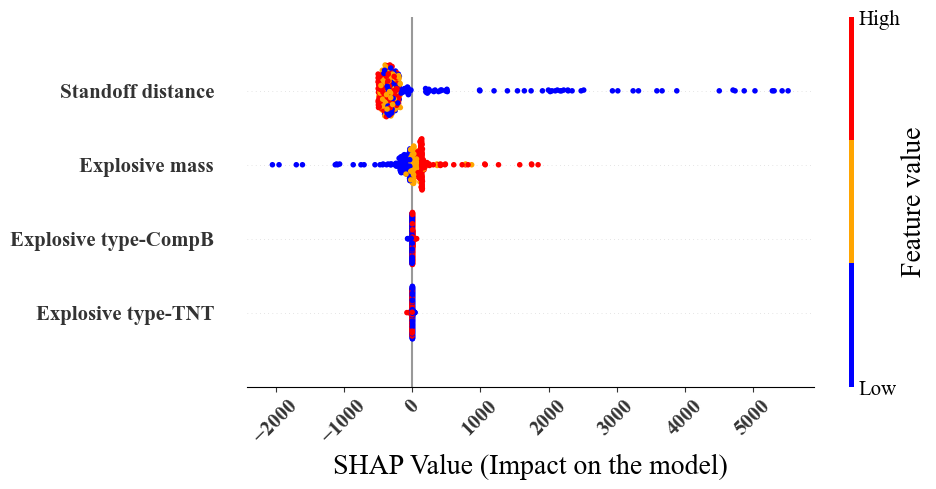

In [36]:
#Summary plot type 2
features = ['Explosive type-CompB', 'Explosive type-TNT', 'Explosive mass', 'Standoff distance']

shap.summary_plot(shap_values, X_train, feature_names=features, show=False,cmap = cmap)
# Get the current figure and axes objects.
fig = plt.gcf()
print (plt.get_fignums())
print ("labels",plt.get_figlabels())
plt.gcf().set_size_inches(10,5)
plt.xlabel("SHAP Value (Impact on the model)", fontsize=20)
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.xticks(rotation=45)

# Get colorbar
cb_ax = fig.axes[1] 

# Modifying color bar parameters
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel("Feature value", fontsize=20)
plt.savefig('Images/SHAP1.png', dpi = 600, bbox_inches = 'tight')

In [40]:
X_test = pd.DataFrame(X_test, columns= features)
print (X_test)

    Explosive type-CompB Explosive type-TNT Explosive mass Standoff distance
0                    0.0                1.0           15.5              17.5
1                    1.0                0.0           13.0               2.5
2                    0.0                1.0           17.5               6.5
3                    0.0                1.0            7.5               4.5
4                    1.0                0.0            5.5              16.5
..                   ...                ...            ...               ...
172                  0.0                1.0           19.5              18.5
173                  0.0                1.0            1.5               1.5
174                  1.0                0.0           21.0              16.5
175                  1.0                0.0            0.5               9.5
176                  1.0                0.0            9.5               1.0

[177 rows x 4 columns]


In [39]:
#Waterfall Plot (for an instance)
explainer2 = shap.Explainer(regressor.predict, X_test)
#X_test.columns=features
shap_values2 = explainer2(X_test)

shap.waterfall_plot(shap_values2[4], show=False)
plt.gcf()
#print (plt.get_fignums())


plt.gcf().set_size_inches(10,5)
plt.xticks(fontsize = 15,weight='bold')
#plt.tick_params(y, pad = 10)
#plt.xlabel("SHAP Value (Impact on the model)", fontsize=30)
plt.ylabel(features, fontsize = 30,weight='bold')
#print (plt.bar_label())
#left, right = plt.xlim()
#print (left, right)
#plt.xlim(left = 450)
#plt.xticks(fontsize = 15,weight='bold')

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

(array([113.52, 113.52]),
 [Text(113.51526001873566, 1, '$f(x)$'),
  Text(113.51526002873565, 1, '$ = 113.515$')])

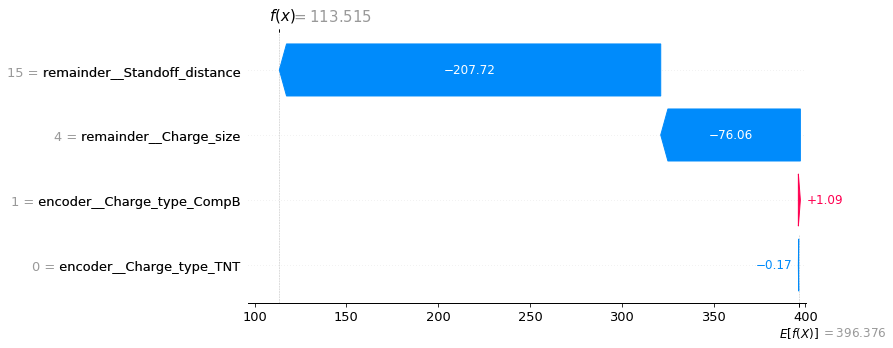

In [14]:
shap.waterfall_plot(shap_values2[25], show=False)
plt.gcf().set_size_inches(10,5)
plt.xticks(fontsize = 15,weight='bold')